# Forest Cover Type Prediction


Following classifiers and algorithms have been used for supervised learning. These are listed below in the sequence per week:

- k Nearest Neighbors
- Naive Bayes 
- Decision trees, including Random Forests and Adaboost
- Logistic regression
- Stochastic Gradient Descent
- Neural Networks
- Support Vector machine
- Gaussian Mixture Model


#### *The accuracy of the best model will be reported on the dev data, since test data does not have labels. The scope of this project does not include outputting results for the kaggle "test" data set, since the kaggle competion is no longer open.*

- *There will be no loading or processing done on test data in this whole exercise.*

### Import Libraries

In [2]:
# General libraries.

#If your seaborn plots do not run, uncomment the following, run it and restart your kernel
#!pip install -U seaborn


import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn libraries for feature preprocessing.
from sklearn import preprocessing

# SK-learn libraries for dimensionality reduction.
from sklearn.decomposition import PCA

# Data analysis and plotting 
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import copy
import time

np.random.seed(0)
print ("OK")
import tensorflow as tf
print("Tensorflow version", tf.__version__)

%matplotlib inline


OK
Tensorflow version 2.5.0


# Part 1: Data Loading, Processing and Exploratory Data Analysis

### Dataset Description


**Labels**

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

**Data Fields**

- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

**The wilderness areas are:**

- 1 - Rawah Wilderness Area
- 2 - Neota Wilderness Area
- 3 - Comanche Peak Wilderness Area
- 4 - Cache la Poudre Wilderness Area

**The soil types are:**

- 1 Cathedral family - Rock outcrop complex, extremely stony.
- 2 Vanet - Ratake families complex, very stony.
- 3 Haploborolis - Rock outcrop complex, rubbly.
- 4 Ratake family - Rock outcrop complex, rubbly.
- 5 Vanet family - Rock outcrop complex complex, rubbly.
- 6 Vanet - Wetmore families - Rock outcrop complex, stony.
- 7 Gothic family.
- 8 Supervisor - Limber families complex.
- 9 Troutville family, very stony.
- 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
- 11 Bullwark - Catamount families - Rock land complex, rubbly.
- 12 Legault family - Rock land complex, stony.
- 13 Catamount family - Rock land - Bullwark family complex, rubbly.
- 14 Pachic Argiborolis - Aquolis complex.
- 15 unspecified in the USFS Soil and ELU Survey.
- 16 Cryaquolis - Cryoborolis complex.
- 17 Gateview family - Cryaquolis complex.
- 18 Rogert family, very stony.
- 19 Typic Cryaquolis - Borohemists complex.
- 20 Typic Cryaquepts - Typic Cryaquolls complex.
- 21 Typic Cryaquolls - Leighcan family, till substratum complex.
- 22 Leighcan family, till substratum, extremely bouldery.
- 23 Leighcan family, till substratum - Typic Cryaquolls complex.
- 24 Leighcan family, extremely stony.
- 25 Leighcan family, warm, extremely stony.
- 26 Granile - Catamount families complex, very stony.
- 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
- 28 Leighcan family - Rock outcrop complex, extremely stony.
- 29 Como - Legault families complex, extremely stony.
- 30 Como family - Rock land - Legault family complex, extremely stony.
- 31 Leighcan - Catamount families complex, extremely stony.
- 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
- 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
- 34 Cryorthents - Rock land complex, extremely stony.
- 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
- 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
- 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
- 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
- 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
- 40 Moran family - Cryorthents - Rock land complex, extremely stony.

## 1.1. Data Loading

**Let's load just the training data**

In [3]:
#loading train data
train=pd.read_csv('train.csv')

train_label = train.Cover_Type #setting the last column `Cover_type` as label for train dataset.

# We also discard the 1st variable(ID), which does not provide any information about the forest cover type.
train_data = train.drop(['Id', 'Cover_Type'], axis = 1)

print(train.shape)
print(train_data.shape)
print(train_label.shape)

#loading test data
#test = pd.read_csv('test.csv')
#test_data = test.drop(['Id'], axis = 1) # Dropping first column `Id`. There are no labels in the test data


(15120, 56)
(15120, 54)
(15120,)


**Observations**

The original train dataset contains 15120 observations with 56 features.(containing both `Id` and the `Cover_Type`)

**Explaining the features:**

- All features are either continous or binary. There are no text fields.
- Soil_Type fields are binary.
- Wilderness Area fields are binary.
- Without considering the first column, `ID`, The first 10 features of each observation (`Elevation` to `Horizontal_Distance_To_Fire_Points`) are continuous, with different ranges. All 10 features are numeric variables.
- 4 of the remaining 44 binary features correspond to `Wilderness_Area` (i.e., there are 4 possible types), so any observation will have one 1 and three 0's in those columns. 
- The last 40 features correspond to the `Soil_Type` (i.e., there are 40 possible types), so any observation will have one 1 and thirty-nine 0's in those columns.


**Training datset:**

There are a total of 15120 observations in the training set, that contains 55 features and the `Cover_Type`.

As a part of data processing,

  - *The first column has been dropped, since it is not really a feature but more of an observation ID*
 
  - *The last column is the train_label*

This finally gives us a train dataset with **15120 observations** and **54 features**.


### Split training data into training and validation data (develepment data)

*To evaluate our performance, we'll split the training set in 2 subsets: training data (90%) and development or validation data (10%).*

*Test data must not be used to validate the models, because it introduces bias. Test data must be looked at just once in the whole model building process. Looking at test data multiple times introduces bias and we end up learning the error rate on test data beforehand and try to tweak the training parameters, which is not recommended.*

In [4]:
# Shuffle the data, but make sure that the features and accompanying labels stay in sync.

np.random.seed(0)
shuffle = np.random.permutation(np.arange(train_data.shape[0]))
#train_data = train_data.iloc[shuffle,:]
train_data, train_label = train_data.iloc[shuffle], train_label.iloc[shuffle]

# Split into train (90%) and dev (10%)

train_data, dev_data, train_label, dev_label = train_test_split(train_data, train_label, train_size=0.90)

print(train_data.shape)
print(train_label.shape)
print(dev_data.shape)
print(dev_label.shape)

(13608, 54)
(13608,)
(1512, 54)
(1512,)


## 1.2. Exploratory Data Analysis

**Step 1: Describe the dataset**

In [57]:
all_data=pd.read_csv('train.csv')

#print(all_data.head())

all_data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

**Step 2: Look for unique values**

In [5]:
#Looking for the total number of unique values by column
all_data.nunique()

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

**Step 3: Look for NA values**

In [6]:
#Checking for any na values
all_data.isna().sum()
#Result says we have none

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


**Observation:**

There are no NA values in the data.

**Step4: looking for outliers or miscoded values**

In [7]:
#looking for outliers or miscoded values
all_data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


**Step 5: Let's take a look at the distribution of values, for the continuous variables**

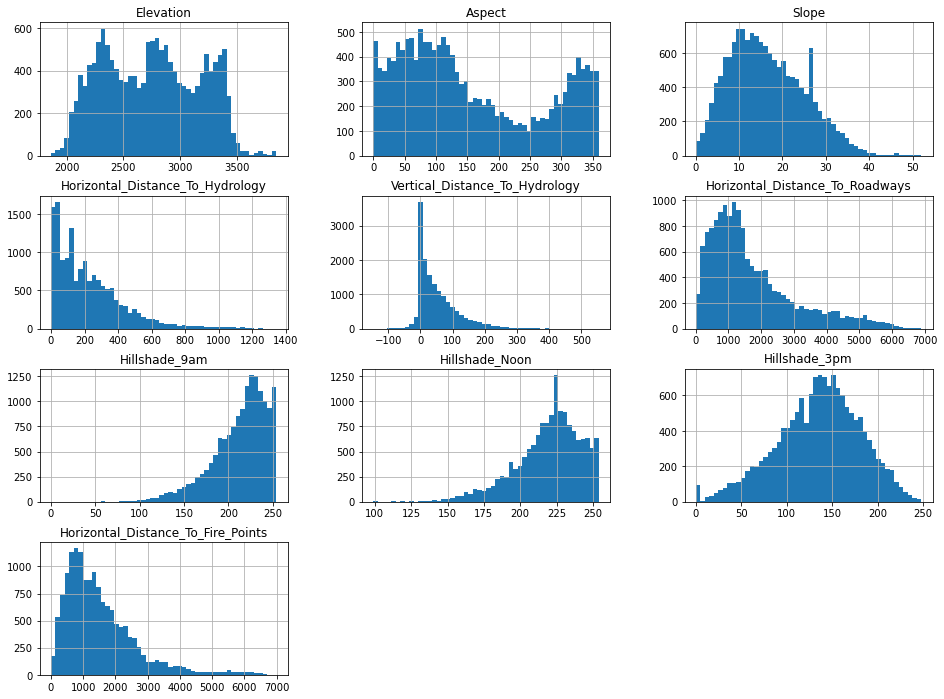

In [8]:
train_df = all_data.iloc[:,1:11]
train_df.hist(figsize=(16,12),bins=50)
plt.show()

We noticed that the histogram of `Hillshade_3pm` contains several 0's, in the training set, which might make us think of missing values coded with 0, but according to the dataset description, this feaure can take value as 0, so these entries are valid.


**Step 6: The next thing we should examine is the distribution of our variable of interest, `Cover_Type` in the data set.**

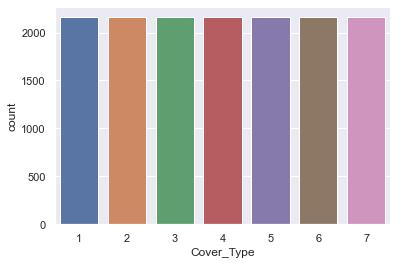

In [9]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Cover_Type", data=all_data)

It looks like there is a perfectly even distribution of 'Cover_Type' in our data. This is ideal, as it means we have an equal number of examples for each of our data types, allowing us to avoid a situation where one type in particular is predicted poorly due to a lack of examples.


**Step 7: The next thing for us to examine is the distribution of our feature variables across the target variable. This should allow us some insight into which variables might be useful for prediction.**

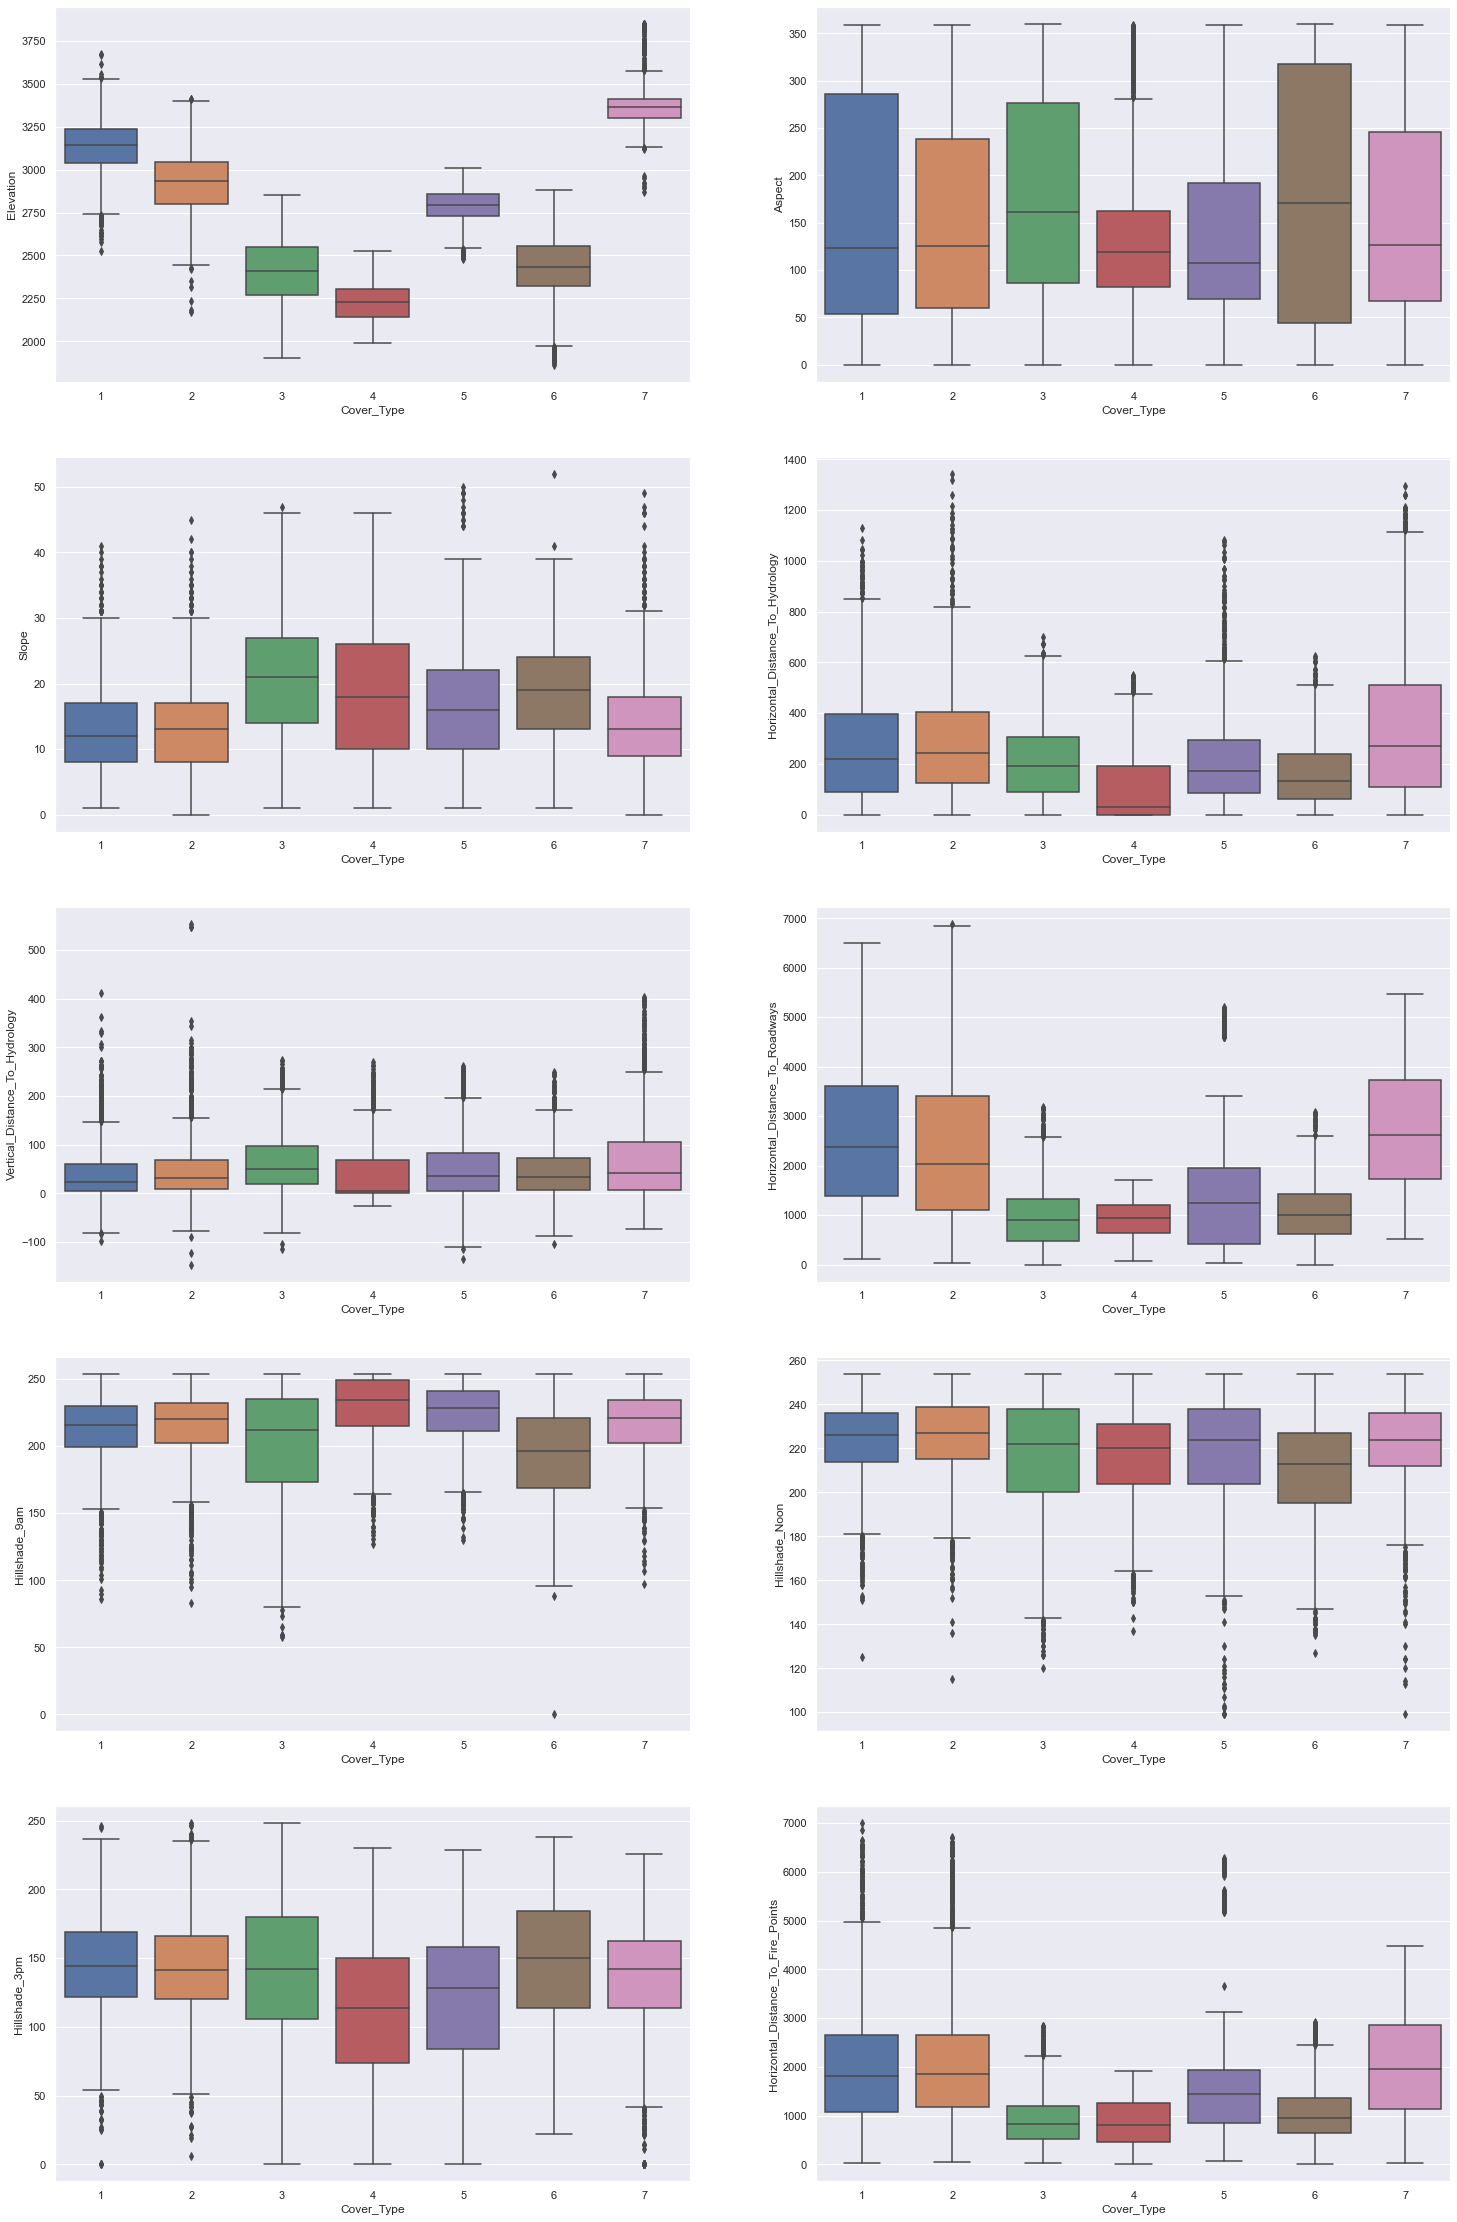

In [10]:
#Next lets look at the distribution of the numeric variables across cover types.
plotcount=10
fig, axes = plt.subplots(nrows = 5,ncols = 2,figsize = (25,40))
for i in range(0,plotcount):
    row = i // 2
    col = i % 2
    ax1 = axes[row, col]
    sns.boxplot(x="Cover_Type", y=all_data.columns[i+1], data=all_data,ax=ax1);

As we can see from the boxplots above, many of our continuous variables have a very similar distribution across cover types. The only one that stands out by eye is "Elevation", which appears to vary quite differently by each cover type.


**Step 8: Another important piece to examine is the correlation of each of the continuous explanatory variables with each other. Too high of a correlation, or even a perfect correlation, between too many features could be problematic for our model.**

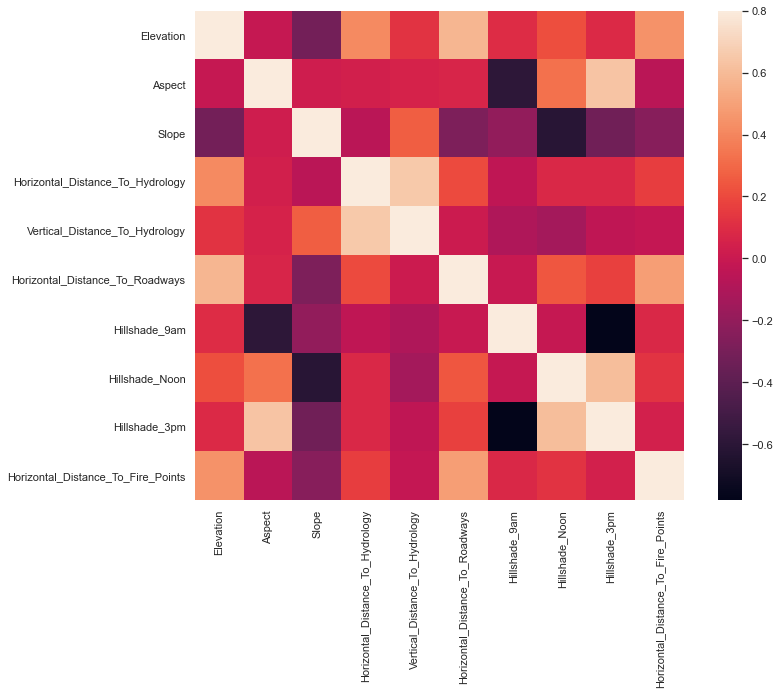

In [11]:
#let's look at the numeric predictor variables and see which are correlated
correlations = all_data.iloc[:,1:11].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlations, vmax=.8, square=True);

It looks like there are some variables that are highly correlated. Many of them make intuitive sense. For example, Slope and Hillshade at noon are highly correlated. This makes sense, as the slope of a hill will have a direct impact on the shade when the sun is directly overhead. Likewise, Aspect (also known as the direction the hill is facing) is highly correlated with shade in the morning and evening. When the sun is low in the sky on either side, east or west facing slopes will have very different amounts of shade.

Luckily for us it appears that nothing has a perfect correlation, which could adversely affect something like a regression model, but the high correlation between these variables may make them less useful when fitting our classifiers.


**Step 9: Finally we need to look at our categorical variables. We will plot each of the 3 groups of categorical variables (Cover Type, Soil Type and Wilderness Area) against each other to look for any patterns.**

0        Soil_Type29
1        Soil_Type29
2        Soil_Type12
3        Soil_Type30
4        Soil_Type29
            ...     
15115     Soil_Type4
15116     Soil_Type4
15117     Soil_Type4
15118     Soil_Type4
15119     Soil_Type2
Length: 15120, dtype: object


<AxesSubplot:xlabel='soil'>

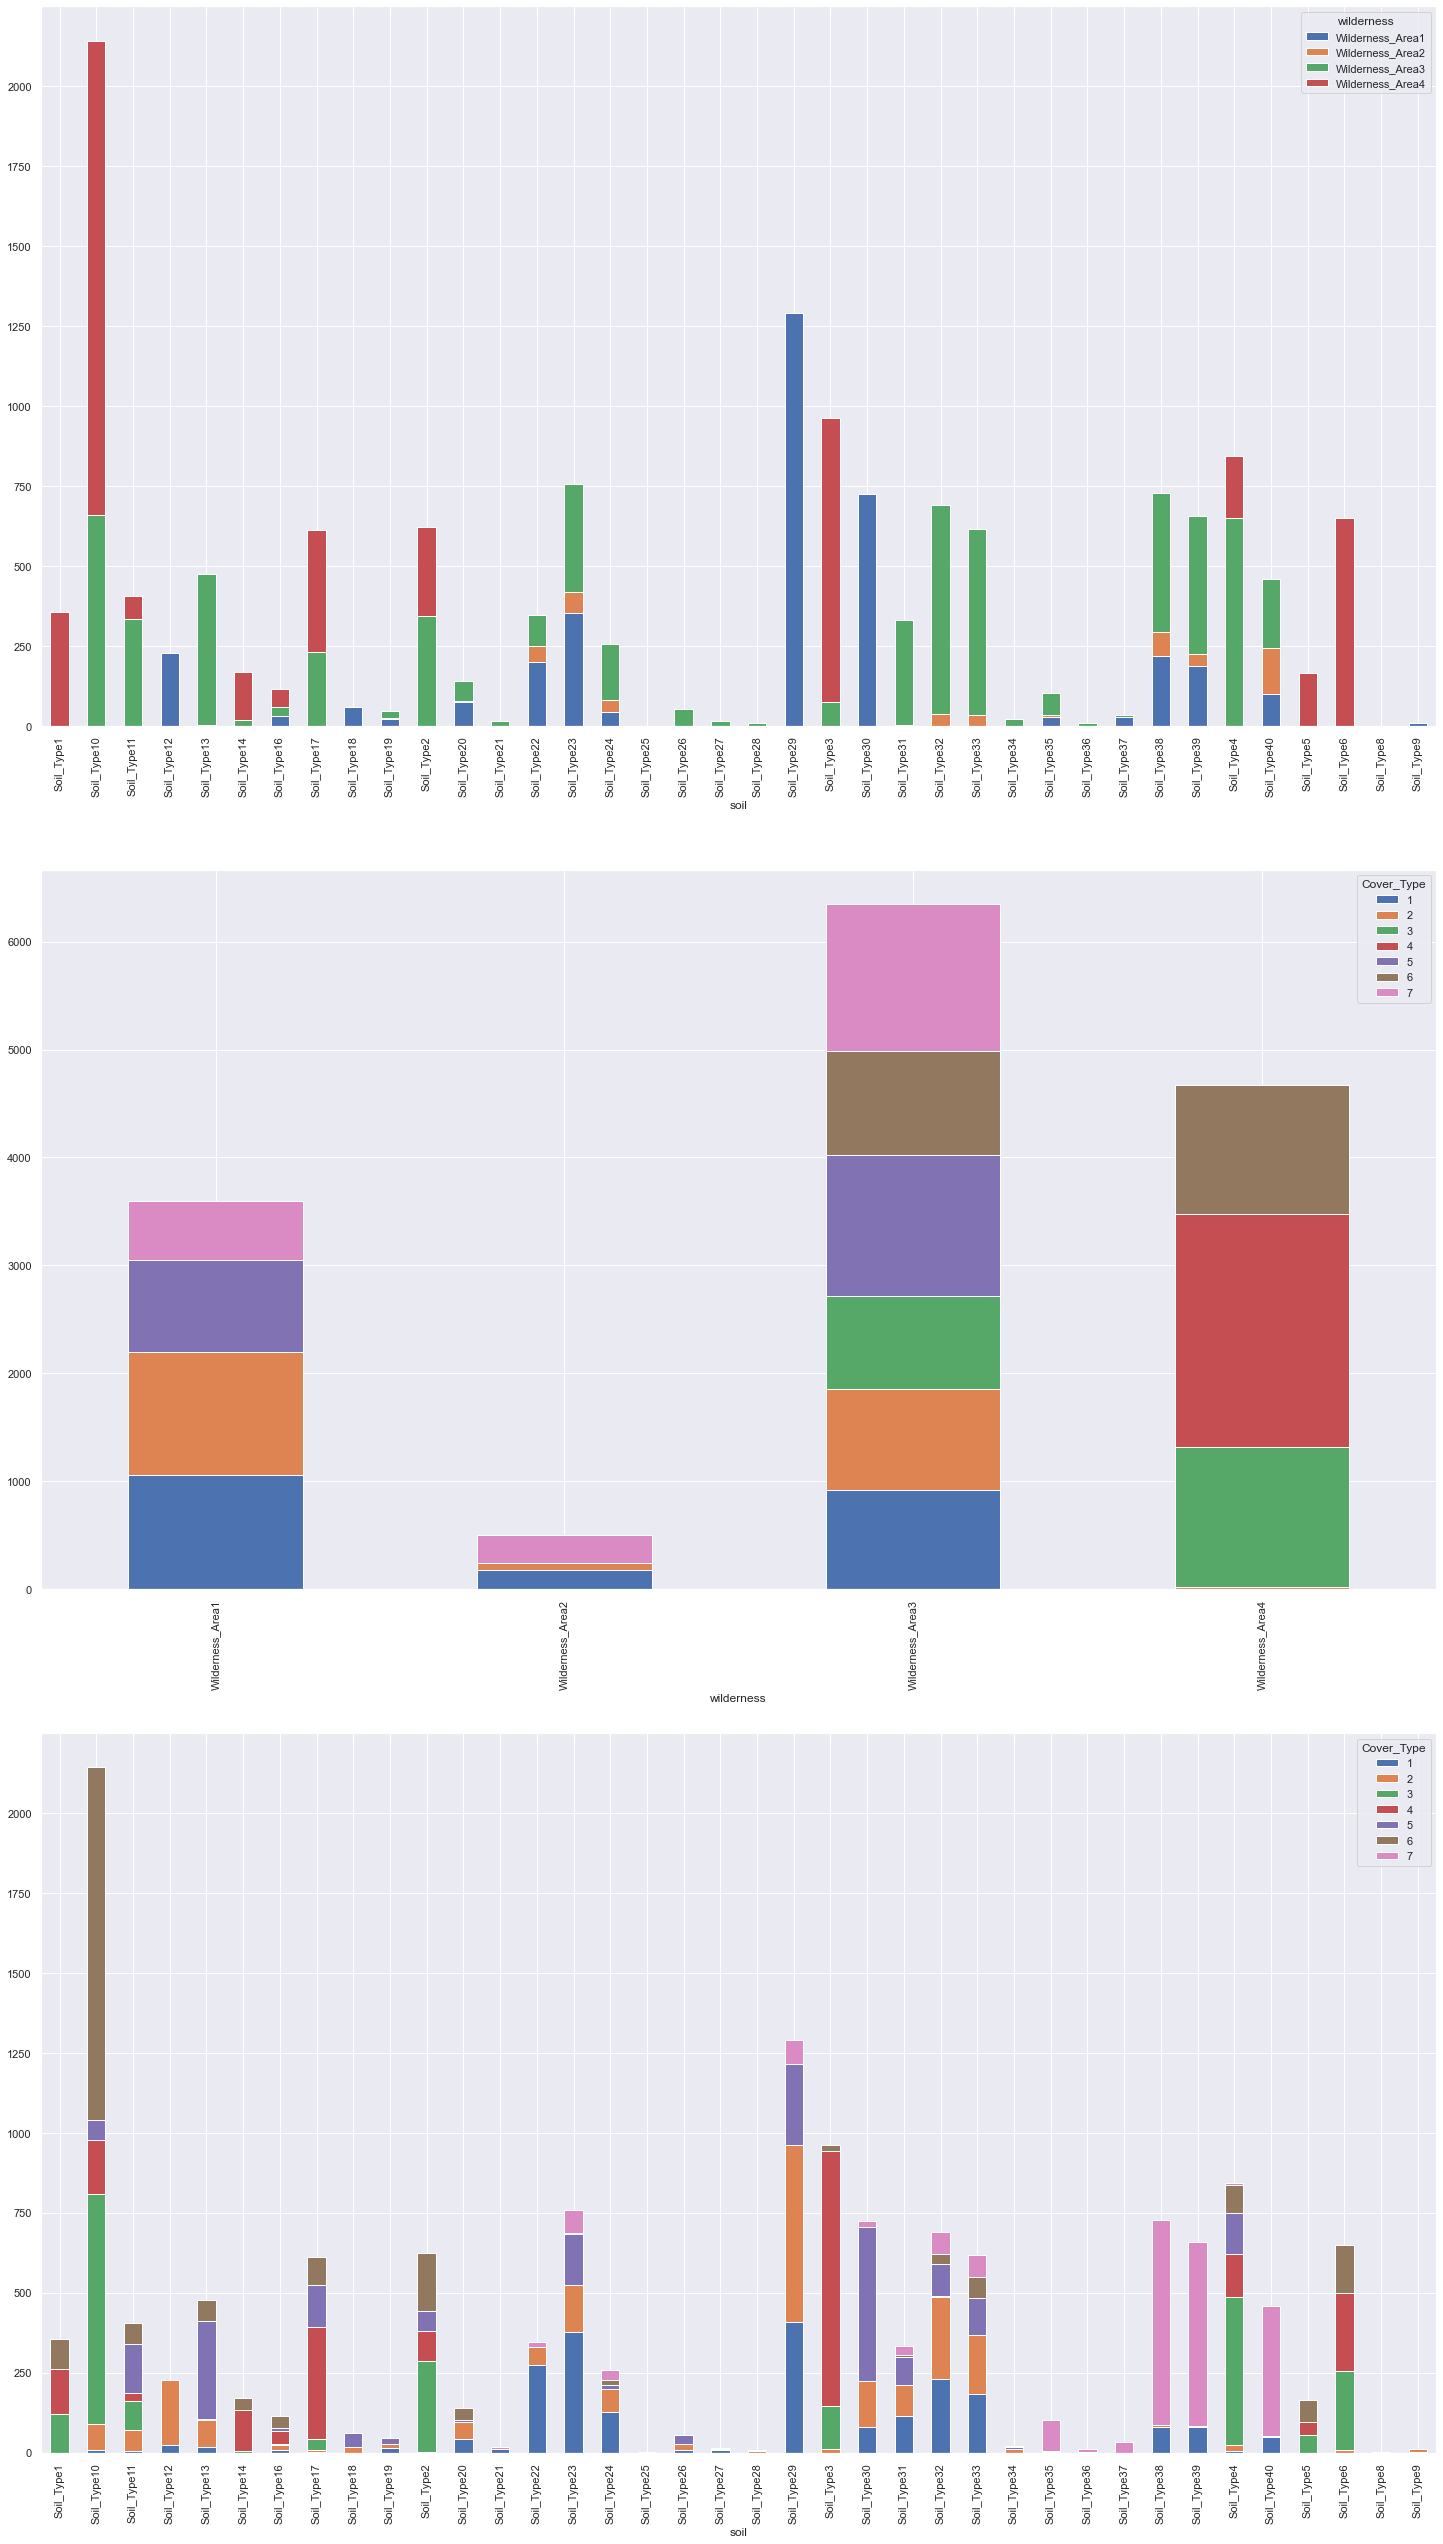

In [12]:
soil_type = all_data.iloc[:,15:55]
soil_type = pd.DataFrame(soil_type)
soil_col = pd.Series(soil_type.columns[np.where(soil_type == 1)[1]])
print(soil_col)

wild_type = all_data.iloc[:,11:15]
wild_type = pd.DataFrame(wild_type)
wild_col = pd.Series(wild_type.columns[np.where(wild_type == 1)[1]])

import copy

plot_data = copy.deepcopy(all_data)
plot_data['soil'] = soil_col
plot_data['wilderness'] = wild_col

fig, axes = plt.subplots(nrows = 3,ncols = 1,figsize = (25,45))

ax1 = axes[0]
pd.crosstab(plot_data.soil, plot_data.wilderness).plot.bar(stacked = True, ax = ax1)

ax2 = axes[1]
pd.crosstab(plot_data.wilderness, plot_data.Cover_Type).plot.bar(stacked = True, ax = ax2)

ax3 = axes[2]
pd.crosstab(plot_data.soil, plot_data.Cover_Type).plot.bar(stacked = True, ax = ax3)

There are absolutely some striking and promising patterns in this data. Firstly we see that some soil types and wilderness areas are mutually exclusive, with certain soils only appearing in certain areas. Likewise, we see that certain cover types are completely absent from certain soil types or wilderness areas. This should mean that these variables will be strongly indicative of what cover type we can expect.

## 1.3. Data Preprocessing


In order to make continuous variable comparable to the binary features, we will be using `preprocessing.MinMaxScaler`, to standardize them by scaling each feature to a given range; [0,1].
This can help in `Logistic regression` model and `kNN` model.

We also use `preprocessing.StandardScaler`, to standardize 10 continuous feature by moving the mean and scaling to unit variance),

With scaled features, there is no surity that the model results will improve, although it is mandatory in this case, since the dataset is a combination of continuous and binary features.

In [7]:
# Scale to mean = 0, sd = 1 using StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
std_scaler = preprocessing.StandardScaler()

train_data_std = copy.deepcopy(train_data)
dev_data_std = copy.deepcopy(dev_data)
#test_data_std = copy.deepcopy(test_data)

# only for the continuous features (first 10 columns in the train_data, dev_data and test_data)
train_data_std.iloc[:, :10] = std_scaler.fit_transform(train_data_std.iloc[:, :10])
dev_data_std.iloc[:, :10] = std_scaler.transform(dev_data_std.iloc[:, :10])
#test_data_std.iloc[:, :10] = std_scaler.transform(test_data_std.iloc[:, :10])

# Scale to range [0,1] using MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

train_data_minmax = copy.deepcopy(train_data)
dev_data_minmax = copy.deepcopy(dev_data)
#test_data_minmax = copy.deepcopy(test_data)

# Only for the continuous features (first 10 columns in the train_data, dev_data and test_data)
train_data_minmax.iloc[:, :10] = min_max_scaler.fit_transform(train_data.iloc[:, :10])
dev_data_minmax.iloc[:, :10] = min_max_scaler.transform(dev_data.iloc[:, :10])
#test_data_minmax.iloc[:, :10] = min_max_scaler.transform(test_data.iloc[:, :10])

# Feature Binarization is the process of thresholding numerical features to get boolean values,(first 10 columns in the train_data, dev_data and test_data, since they are non-binary features)
# Binarize feature values to either 0 or 1, using binarizer
binarizer = preprocessing.Binarizer()

train_data_b = copy.deepcopy(train_data)
dev_data_b = copy.deepcopy(dev_data)
#test_data_b = copy.deepcopy(test_data)

# Only for the continuous features (first 10 columns in the train_data, dev_data and test_data)
train_data_b.iloc[:, :10] = binarizer.fit_transform(train_data.iloc[:, :10])
dev_data_b.iloc[:, :10] = binarizer.transform(dev_data.iloc[:, :10])
#test_data_b.iloc[:, :10] = binarizer.transform(test_data.iloc[:, :10])

print(train_data_b.shape)
#print(train_data_b.head())


(13608, 54)


# Part 2 : Modelling

## Model 1:  
## k-Nearest Neighbors(kNN)

Let's run an experiment with Nearest Neighbors classifier, using fit() and predict() methods from the sklearn classifier implementations.

Let's start by finding the optimal k

In [14]:
# Estimate by cross-validation of the optimal number of neighbors (k)
# Try between 1 and the number of features (54)
#k = {'n_neighbors': np.concatenate([np.arange(1, train_data.shape[1]+1)]).tolist()}
# The optimal value is low, so let's narrow the search from 1 to 11
k = {'n_neighbors': np.concatenate([np.arange(1, 10+1)]).tolist()}
best_param_kNN = GridSearchCV(KNeighborsClassifier(), k, scoring='accuracy')
best_param_kNN.fit(train_data, train_label)
optimal_k = best_param_kNN.best_params_['n_neighbors']
print ('The optimal value for k is {0}'.format(optimal_k))

The optimal value for k is 1


In [67]:
# first approach of finding kNN with different data manipulations

kNN = KNeighborsClassifier(n_neighbors=optimal_k)

start_time = time.time()
kNN.fit(train_data, train_label)
print ('Accuracy using non-scaled data: {0:.4f}'.format(kNN.score(dev_data, dev_label)))
print ('Train time = %.2f' %(time.time() - start_time))

start_time = time.time()
kNN.fit(train_data_std, train_label)
print ('\nAccuracy using standardized data: {0:.4f}'.format(kNN.score(dev_data_std, dev_label)))
print ('Train time = %.2f' %(time.time() - start_time))

start_time = time.time()
kNN.fit(train_data_minmax, train_label)
print ('\nAccuracy using scaled-to-range data: {0:.4f}'.format(kNN.score(dev_data_minmax, dev_label)))
print ('Train time = %.2f' %(time.time() - start_time))

Accuracy using non-scaled data: 0.8452
Train time = 0.40

Accuracy using standardized data: 0.8075
Train time = 0.39

Accuracy using scaled-to-range data: 0.8234
Train time = 0.37


As we can see, the model performed better with non-scaled data, although the optimal k was searched above using non-scaled data, if we calculate optimal-k even with standardized or scale_to_range data, it gives the same result.


In [41]:
# second approach of finding kNN without finding the optimal value first
#Here are our K values to try
k_values = [1, 3, 5, 7, 9]

start_time = time.time()
for i in k_values:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(train_data.iloc[:, :10], train_label)
    preds = clf.predict(dev_data.iloc[:, :10])

    # And calculate the accuracy by comparing it to the labels
    correct, total = 0, 0
    for pred, label in zip(preds, dev_label):
        if pred == label: 
            correct += 1
        total += 1

    # Finally we print the outcomes
    Outcome = ["For the model with", str(i), "Nearest Neighbors:"]
    print(" ".join(Outcome))
    print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))
    print()
print ('Train time = %.2f' %(time.time() - start_time))

For the model with 1 Nearest Neighbors:
total: 1512  correct: 1278  accuracy: 0.85

For the model with 3 Nearest Neighbors:
total: 1512  correct: 1254  accuracy: 0.83

For the model with 5 Nearest Neighbors:
total: 1512  correct: 1230  accuracy: 0.81

For the model with 7 Nearest Neighbors:
total: 1512  correct: 1188  accuracy: 0.79

For the model with 9 Nearest Neighbors:
total: 1512  correct: 1165  accuracy: 0.77

Train time = 0.27


### We will proceed with the accuracy result from kNN as our baseline and will try to meet or improve the baseline using different classifiers below.

## Model 2:
## Decision Tree

Decision trees are powerful machine learning algorithms that iteratively split the data based on binary 'Yes/No' decision criterion. This has the advantage of both working well with data that is already highly binary, such as our "Wilderness Area" and "Soil Type" variables, and being explainable to non-technical audiences. 

In order to properly utilize the Decision Tree Algorithm, our first task is to binarize all the columsn in the data. For most of our variables, this is fairly easy, as they are already structured as binary indicator variables. For our remaining numeric variables, we need to look at the distribution of our data to see if there are natural breakpoints we can utilize.

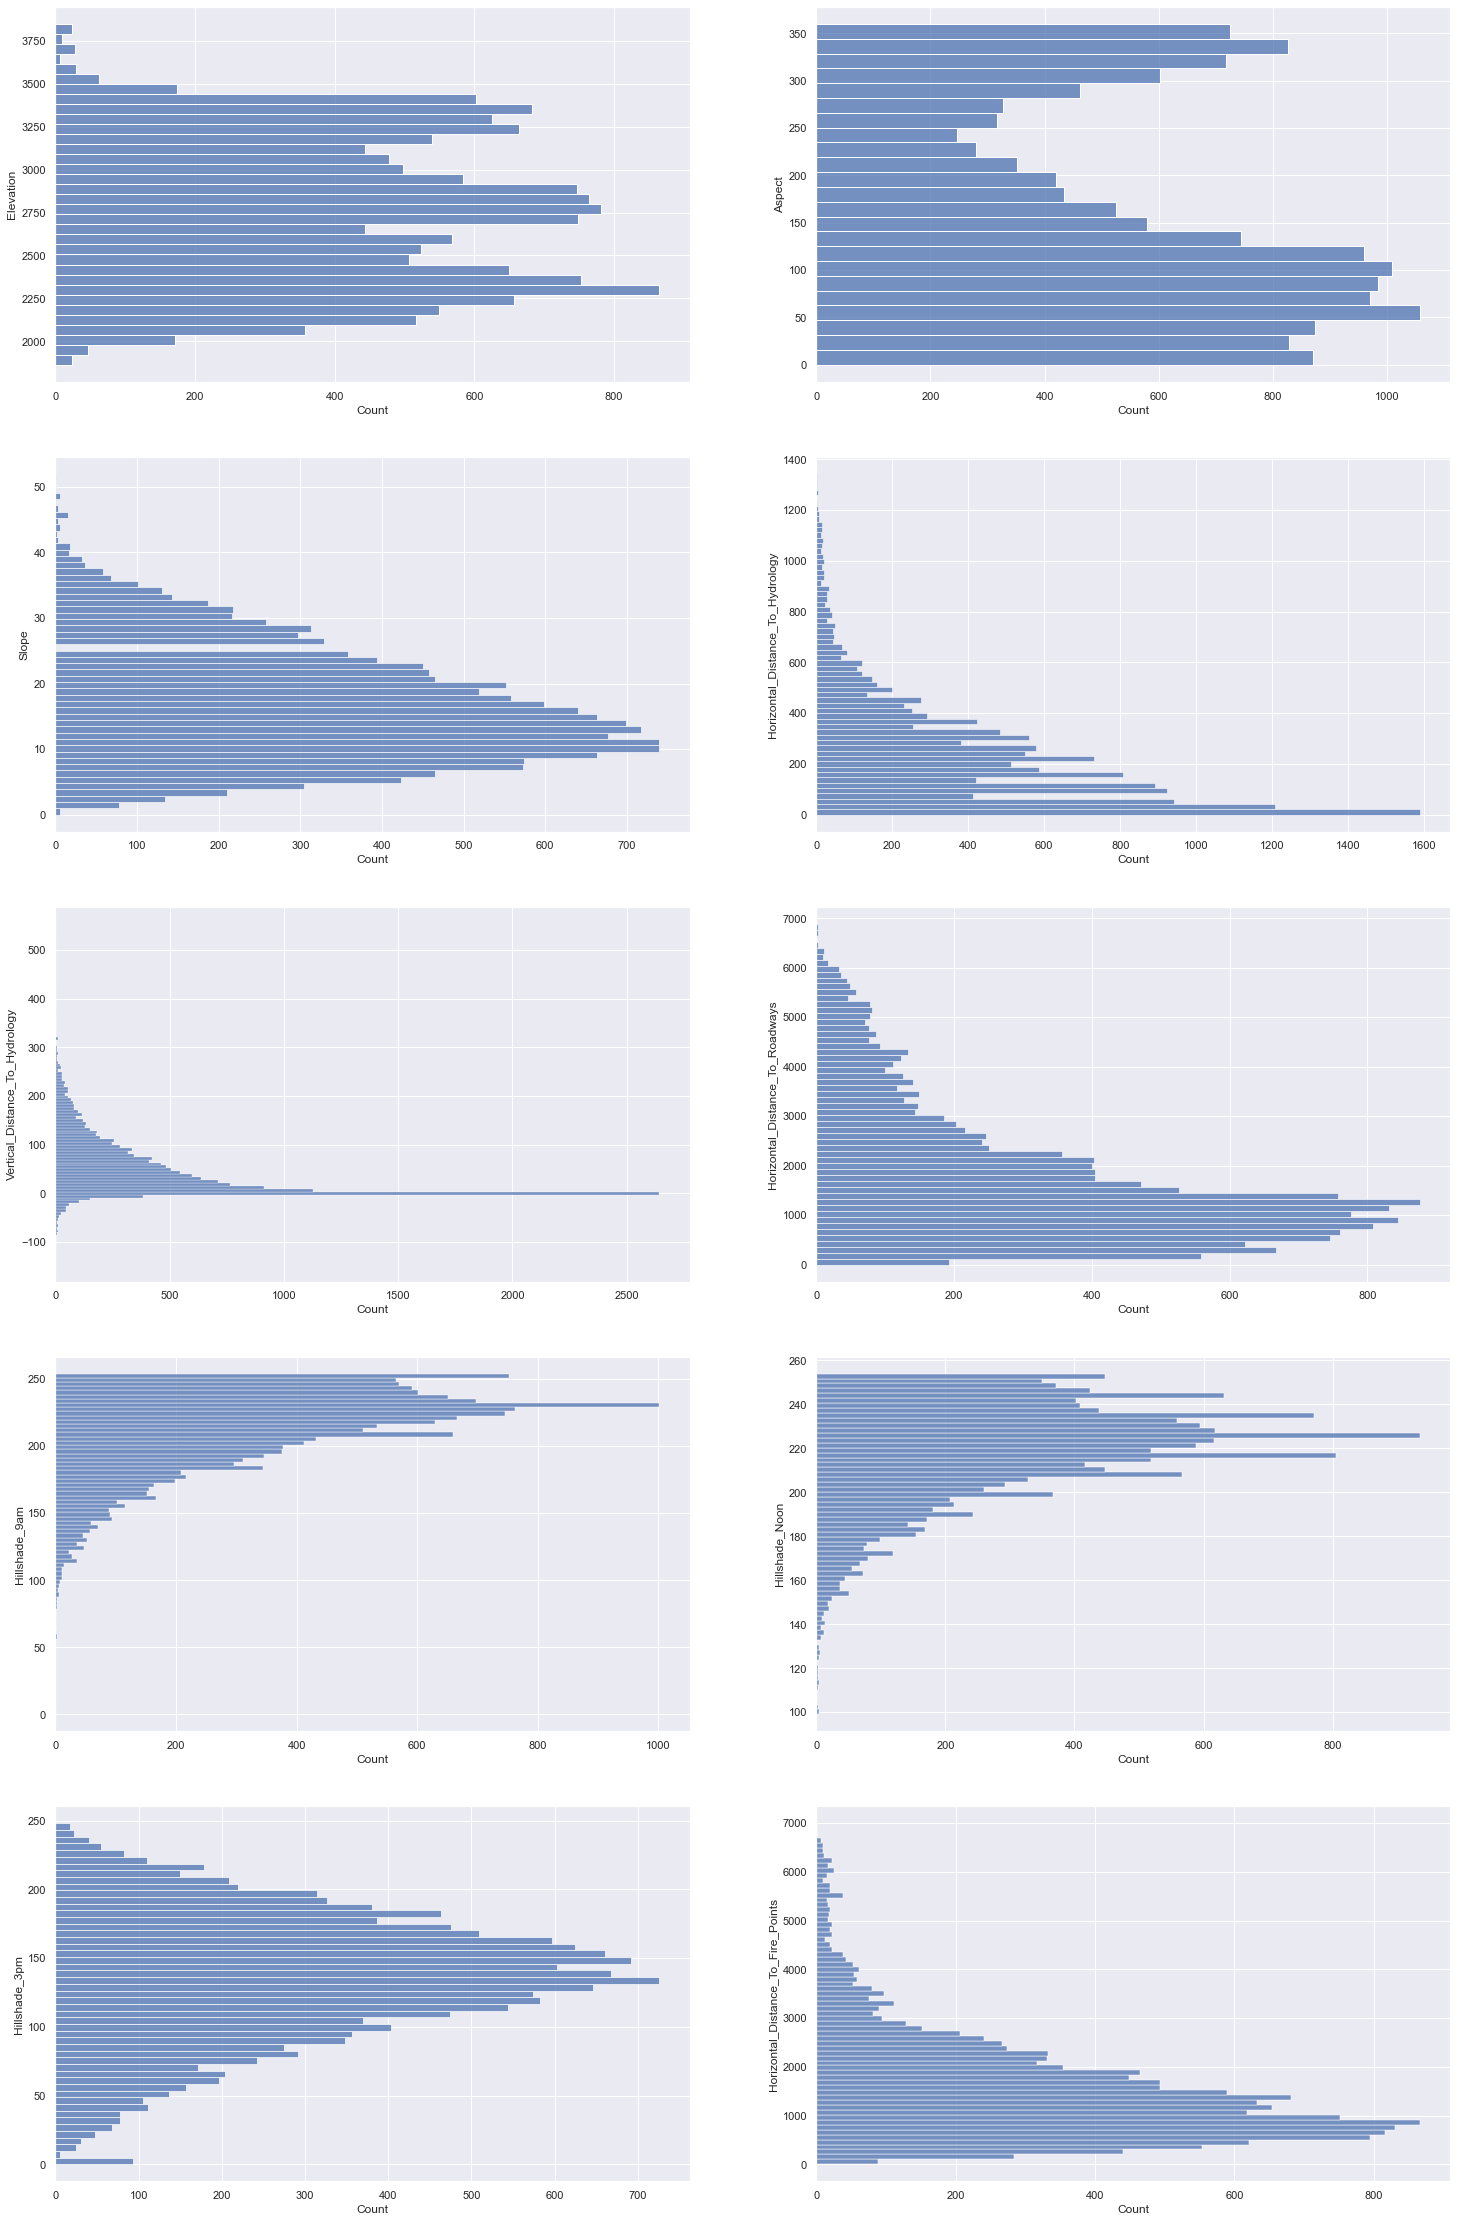

In [17]:
#Creating our plot grid
plotcount=10
fig, axes = plt.subplots(nrows = 5,ncols = 2,figsize = (25,40))
#Plotting our variables
for i in range(0,plotcount):
    row = i // 2
    col = i % 2
    ax1 = axes[row, col]
    sns.histplot(y=all_data.columns[i+1], data=all_data,ax=ax1);

It looks like some of our variables have obvious breakpoints, while others have a fairly smooth distribution.

The variables with obvious breakpoints are:
* Elevation: Elevation looks to have 3 groups, one from 0 to about 2625, one from 2625 to 3125 and one for 3125 and above
* Aspect: Aspect seems to be split into two groups right at 250
* Slope: Slope has a gap at 26 degrees. We can try breaking here
* Horizontal_Distance_To_Hydrology: This seems to have a large amount of data below 100 feet, and a long tail above that
* Vertical_Distance_To_Hydrology: This feature seems to have an overwhelming amount of the data at exactly 0, so we will split it there

The other variables: Horizontal_Distance_To_Roadways, the Hillshade variables, and Horizontal_Distance_To_Fire_Points seem to have a fairly smooth distribution. Luckily, since we know the criterion that a decision tree will split on (information gain), we can choose to binarize our continuous variables at those points which maximize this criterion.


In [18]:
#First we will create a copy of our data that we can modify
tree_train_data = copy.deepcopy(train_data)
tree_train_labels = copy.deepcopy(train_label)
tree_dev_data = copy.deepcopy(dev_data)
tree_dev_labels = copy.deepcopy(dev_label)

In [19]:

###This block of four functions work together to find the point each variable can be split to maximize information gain.

def entropy(distribution):
    #initialize entropy at zero
    h = 0.0
    for probability in distribution:
        logprob = -100.0  # log(0) = -inf so let's approximate it with -100 to avoid an error
        if probability > 0.0: logprob = np.log2(probability)
        h -= probability * logprob
    return h

def get_label_distribution(labels):
    # Initialize counters for all labels to zero.
    label_probs = np.array([0.0 for i in range(7)])

    # Iterate over labels in the training data and update counts.
    for label in labels:
        label_probs[label-1] += 1.0
    
    # Normalize to get a distribution.
    label_probs /= label_probs.sum()
    return label_probs

def information_gain(data, labels, feature, threshold=0):
    # Get the initial entropy of the label distribution.
    initial_entropy = entropy(get_label_distribution(labels))
    
    # subset0 will contain the labels for which the feature is 0 and
    # subset1 will contain the labels for which the feature is 1.
    subset0, subset1 = [], []
    for datum, label in zip(data, labels):
        if datum[feature] > threshold: subset1.append(label)
        else: subset0.append(label)
    
    # Compute the entropy of each subset.
    subset0_entropy = entropy(get_label_distribution(subset0))
    subset1_entropy = entropy(get_label_distribution(subset1))
    
    # Compute the final entropy by weighting each subset's entropy according to its size.
    subset0_weight = 1.0 * len(subset0) / len(labels)
    subset1_weight = 1.0 * len(subset1) / len(labels)
    final_entropy = subset0_weight * subset0_entropy + subset1_weight * subset1_entropy
    
    # Finally, compute information gain as the difference between the initial and final entropy.
    return initial_entropy - final_entropy

def try_features_and_thresholds(x, y, emptylist = []):
    #This function is what actually tries the different threshold values and chooses the best one
    data = x.to_numpy()
    labels = y.to_numpy()
    for feature in range(data.shape[1]):
        # Choose a set of thresholds between the min- and max-valued feature, ignoring the min and max themselves.
        thresholds = np.linspace(data[:,feature].min(), data[:,feature].max(), 102)[1:-1]

        # Try each threshold and keep track of the best one for this feature.
        best_threshold = 0
        best_ig = 0
        for threshold in thresholds:
            ig = information_gain(data, labels, feature, threshold)
            if ig > best_ig:
                best_ig = ig
                best_threshold = threshold

        # Show the best threshold and information gain for this feature.
        print ('%d %.3f %.3f %s' %(feature, best_threshold, best_ig, x.columns[feature]))
        emptylist.append(best_threshold)
    return emptylist

#Now we run it on our model to get the best thresholds to binarize each variable
bestcutoffs = try_features_and_thresholds(tree_train_data.iloc[:,0:10], tree_train_labels)

0 2688.861 0.736 Elevation
1 267.327 0.034 Aspect
2 18.020 0.075 Slope
3 39.891 0.092 Horizontal_Distance_To_Hydrology
4 6.475 0.040 Vertical_Distance_To_Hydrology
5 1569.010 0.270 Horizontal_Distance_To_Roadways
6 188.614 0.067 Hillshade_9am
7 200.287 0.031 Hillshade_Noon
8 88.396 0.052 Hillshade_3pm
9 1899.842 0.180 Horizontal_Distance_To_Fire_Points


Now that we've found the appropriate cutoffs for each of our continuous variables, we can turn them into binary indicators. It's important that we do this precisely and specifically, since we will need to binarize our test data exactly the same way (rather than by recalculating what the best entropy points are for the test data). This keeps us from incorrectly fitting our model.

In [20]:
def binarize_data_for_tree(x):
    #Now we will create our elevation features, dividing it up into two sections with two new column
    x["Elevation_high"] = np.where(x["Elevation"] > bestcutoffs[0], 1, 0)
    x.drop("Elevation", axis = 1, inplace = True)

    #Next we create our aspect feature
    x["Aspect_high"] = np.where(x["Aspect"] > bestcutoffs[1] , 1, 0)
    x.drop("Aspect", axis = 1, inplace = True)

    #Our slope feature
    x["Slope_high"] = np.where(x["Slope"] > bestcutoffs[2], 1, 0)
    x.drop("Slope", axis = 1, inplace = True)

    #Our Horizontal distance to hydrology feature
    x["Horizon_Dist_Hydrology_high"] = np.where(x["Horizontal_Distance_To_Hydrology"] > bestcutoffs[3], 1, 0)
    x.drop("Horizontal_Distance_To_Hydrology", axis = 1, inplace = True)

    #Our Vertical distance to hydrology feature
    x["Vert_Dist_Hydrology_high"] = np.where(x["Vertical_Distance_To_Hydrology"] > bestcutoffs[4] , 1, 0)
    x.drop("Vertical_Distance_To_Hydrology", axis = 1, inplace = True)

    #Variables split on the mean
    x["Horizon_Dist_Road_high"] = np.where(x["Horizontal_Distance_To_Roadways"] > bestcutoffs[5], 1, 0)
    x.drop("Horizontal_Distance_To_Roadways", axis = 1, inplace = True)

    x["Hillshade_9am_high"] = np.where(x["Hillshade_9am"] > bestcutoffs[6], 1, 0)
    x.drop("Hillshade_9am", axis = 1, inplace = True)

    x["Hillshade_Noon_high"] = np.where(x["Hillshade_Noon"] > bestcutoffs[7], 1, 0)
    x.drop("Hillshade_Noon", axis = 1, inplace = True)

    x["Hillshade_3pm_high"] = np.where(x["Hillshade_3pm"] > bestcutoffs[8], 1, 0)
    x.drop("Hillshade_3pm", axis = 1, inplace = True)

    x["Horizon_Dist_Fire_high"] = np.where(x["Horizontal_Distance_To_Fire_Points"] > bestcutoffs[9], 1, 0)
    x.drop("Horizontal_Distance_To_Fire_Points", axis = 1, inplace = True)
    

binarize_data_for_tree(tree_train_data)
binarize_data_for_tree(tree_dev_data)
    
#Checking our data
print(tree_train_data.head())
print(tree_dev_data.head())

       Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
4492                  0                 0                 0                 1   
12743                 0                 0                 0                 1   
423                   1                 0                 0                 0   
11191                 0                 0                 1                 0   
10354                 0                 0                 1                 0   

       Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  \
4492            0           0           1           0           0           0   
12743           0           0           0           0           0           0   
423             0           0           0           0           0           0   
11191           0           0           0           0           0           0   
10354           0           0           0           0           0           0   

       ...  Elevation_high

Once we have succressfully binarized our data, we can attempt to fit a single decision tree classifier to make predictions. The two main hyper parameters to be concerned with in a Decision Tree Classifier are the minimum number of samples we require in order to perform a split and the maximum depth of the tree. As noted in the KNN section, we can use the Grid Search Cross-Validation to choose the best parameters for us.

In [21]:
#Setting up our grid search
paramsDT = {'min_samples_split': np.concatenate([np.arange(2, 10+1)]).tolist(),
           'max_depth': [int(x) for x in np.linspace(1, 101, num = 20)]}
best_param_DT = GridSearchCV(DecisionTreeClassifier(), paramsDT, scoring='accuracy')
best_param_DT.fit(tree_train_data, tree_train_labels)
DT_optimal_sample_param = best_param_DT.best_params_['min_samples_split']
DT_optimal_depth_param = best_param_DT.best_params_['max_depth']
#Displaying our best parameter
print ('The optimal value for min_samples_split is {0}'.format(DT_optimal_sample_param))
print ('The optimal value for max_depth is {0}'.format(DT_optimal_depth_param))

#Fitting our classifier with the best parameter
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=DT_optimal_sample_param, 
                             max_depth = DT_optimal_depth_param)
start_time = time.time()
clf.fit(tree_train_data, tree_train_labels)

# Predict on the dev data
preds = clf.predict(tree_dev_data)

# And calculate the accuracy by comparing it to the labels
correct, total = 0, 0
for pred, label in zip(preds, tree_dev_labels):
    if pred == label: 
        correct += 1
    total += 1

# Finally we print the outcomes
Outcome = ["For the model with a minimum sample split of", str(DT_optimal_sample_param), "and a maximum depth of",
          str(DT_optimal_depth_param)]
print(" ".join(Outcome))
print ('total: %3d  correct: %3d  accuracy: %3.3f' %(total, correct, 1.0*correct/total))
print()
print ('Train time = %.2f' %(time.time() - start_time))


The optimal value for min_samples_split is 2
The optimal value for max_depth is 27
For the model with a minimum sample split of 2 and a maximum depth of 27
total: 1512  correct: 1044  accuracy: 0.690

Train time = 0.04


It looks like our best Decision Tree Classifier only achieves an accuracy in the high 60%s. This is not bad, but it fails to best our 1-Neighbor KNN model's score of 84%

## Random Forest Classifier

A Random Forest is, in it's simplest explanation, just an ensemble (or group) of decision trees. First, it selects a random subset of the total training data, then it fits a decision tree to that subset of the data, creating a "forest" of multiple decision trees all trained on slightly different versions of the training data. When it comes time to make predictions, each new data point is run through all of the trees in the forest, with each tree getting a single vote as to it's class. The class with the highest votes is the prediction.

There are three different important hyper parameters for us to tune in a Random Forest. Again we need to consider the minimum size sample needed to split and the max depth, but since we tuned that with our Decision Tree, and this is just an ensemble of those trees, we will keep them the same. The other parameter is the number of trees to include in the forest, "n_estimators".

Because the possible sample space is too computationally intensive to search every possibility, we will use a new search method, RandomizedSearchCV, which searches a set number of random combinations and chooses the best possible parameters. We will look at 100 different possible parameters and search through 15% of them for the best possible option.

In [22]:
#Now we search for the best
paramsRF = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 1000, num = 100)]}
best_param_RF = RandomizedSearchCV(RandomForestClassifier(min_samples_split = DT_optimal_sample_param, 
                             max_depth = DT_optimal_depth_param), param_distributions = paramsRF, 
                             scoring='accuracy', n_iter = 15, cv = 2, verbose = 3)

best_param_RF.fit(tree_train_data, tree_train_labels)
RF_optimal_est_param = best_param_RF.best_params_['n_estimators']

print ('The optimal value for n_estimators is {0}'.format(RF_optimal_est_param))
            
clf = RandomForestClassifier(n_estimators = RF_optimal_est_param, min_samples_split = DT_optimal_sample_param, 
                             max_depth = DT_optimal_depth_param, criterion='entropy')

start_time = time.time()
clf.fit(tree_train_data, tree_train_labels)
# Predict on the dev data
preds = clf.predict(tree_dev_data)

# And calculate the accuracy by comparing it to the labels
correct, total = 0, 0
for pred, label in zip(preds, tree_dev_labels):
    if pred == label: 
        correct += 1
    total += 1

# Finally we print the outcomes
Outcome = ["For the model with", str(RF_optimal_est_param), "estimators",
          "\n a minimum sample split of", str(DT_optimal_sample_param), "and a max depth of", str(DT_optimal_depth_param)]
print(" ".join(Outcome))
print ('total: %3d  correct: %3d  accuracy: %3.3f' %(total, correct, 1.0*correct/total))
print()
print ('Train time = %.2f' %(time.time() - start_time))

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV 1/2] END ..................n_estimators=289;, score=0.690 total time=   1.9s
[CV 2/2] END ..................n_estimators=289;, score=0.682 total time=   1.9s
[CV 1/2] END ..................n_estimators=587;, score=0.692 total time=   3.9s
[CV 2/2] END ..................n_estimators=587;, score=0.680 total time=   4.0s
[CV 1/2] END ..................n_estimators=827;, score=0.690 total time=   6.0s
[CV 2/2] END ..................n_estimators=827;, score=0.683 total time=   5.8s
[CV 1/2] END ..................n_estimators=692;, score=0.690 total time=   5.2s
[CV 2/2] END ..................n_estimators=692;, score=0.682 total time=   4.7s
[CV 1/2] END ..................n_estimators=548;, score=0.691 total time=   3.7s
[CV 2/2] END ..................n_estimators=548;, score=0.683 total time=   3.9s
[CV 1/2] END ..................n_estimators=904;, score=0.691 total time=   6.1s
[CV 2/2] END ..................n_estimators=904;

Though we did manage to beat the results of our single decision tree, we still have not managed to do better than our baseline. Next we will attempt a slightly more complicated ensemble method.

## Adaboost

Adaboost is an ensemble method similar to the Random Forest Algorithm. It fits a number of, in this case decision trees, which get to vote on predictions as before. The difference in this case is how the trees are fit. Adaboost attempts to train each new tree by teaching it to be better at the examples that the previous tree got wrong. It does this by fitting weights to each example. The weights for each example go up when a tree gets them wrong, and go down when a tree gets them right. The objective function for each new tree respects these weights, and puts more emphasis on fitting these difficult examples correctly.

Adaboost with Decision Trees requires all the same parameters as our Random Forest, with one new one that must be optimized: the "learning rate". The learning rate determines how much the weights change between each iteration. We will fit Adaboost with all the optimal parameters determined before, but use Randomized Search CV to determine the optimal learning rate.

In [23]:
#Turning it into a form Adaboost likes
tree_train_data = tree_train_data * 2 -1
tree_dev_data = tree_dev_data * 2 -1

#Now we search for the best learning rate
paramsAD = {'learning_rate': [x for x in np.linspace(start = .001, stop = 2, num = 100)]}
best_param_AD = RandomizedSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(
    min_samples_split = DT_optimal_sample_param, max_depth = DT_optimal_depth_param), n_estimators=RF_optimal_est_param), 
                                   param_distributions = paramsAD, 
                             scoring='accuracy', n_iter = 15, cv = 2, verbose = 3)

start_time = time.time()
best_param_AD.fit(tree_train_data, tree_train_labels)
AD_optimal_learn_param = best_param_AD.best_params_['learning_rate']

print ('The optimal value for learning rate is {0}'.format(AD_optimal_learn_param))
        

#Now we fit our classifier           
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split = DT_optimal_sample_param, 
                                                               max_depth = DT_optimal_depth_param), 
                         n_estimators=RF_optimal_est_param, learning_rate=AD_optimal_learn_param)
clf.fit(tree_train_data, tree_train_labels)
# Predict on the dev data
preds = clf.predict(tree_dev_data)

# And calculate the accuracy by comparing it to the labels
correct, total = 0, 0
for pred, label in zip(preds, tree_dev_labels):
    if pred == label: 
        correct += 1
    total += 1

# Finally we print the outcomes
Outcome = ["For the model with", str(RF_optimal_est_param), "estimators",
          "\n a minimum sample split of", str(DT_optimal_sample_param), "a max depth of", str(DT_optimal_depth_param),
          "\n and a learning rate of", str(AD_optimal_learn_param)]
print(" ".join(Outcome))
print ('total: %3d  correct: %3d  accuracy: %3.3f' %(total, correct, 1.0*correct/total))
print()
print ('Train time = %.2f' %(time.time() - start_time))

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV 1/2] END .learning_rate=0.40483838383838383;, score=0.605 total time=  17.0s
[CV 2/2] END .learning_rate=0.40483838383838383;, score=0.571 total time=  16.1s
[CV 1/2] END ..learning_rate=0.2231111111111111;, score=0.578 total time=  17.1s
[CV 2/2] END ..learning_rate=0.2231111111111111;, score=0.598 total time=  20.3s
[CV 1/2] END ..learning_rate=0.5865656565656565;, score=0.526 total time=  17.7s
[CV 2/2] END ..learning_rate=0.5865656565656565;, score=0.636 total time=  18.2s
[CV 1/2] END ..learning_rate=0.8692525252525253;, score=0.548 total time=  16.3s
[CV 2/2] END ..learning_rate=0.8692525252525253;, score=0.527 total time=  15.8s
[CV 1/2] END ..learning_rate=0.6673333333333333;, score=0.567 total time=  16.0s
[CV 2/2] END ..learning_rate=0.6673333333333333;, score=0.624 total time=  15.5s
[CV 1/2] END ..learning_rate=1.8586565656565655;, score=0.557 total time=  17.2s
[CV 2/2] END ..learning_rate=1.8586565656565655;

## Model 3:
## **Naive Bayes**

Naive Bayes is a supervised learning algorithm based on Bayes' Theorem used for solving classification problems. This algorithm assumes that training instances are independent and identically distributed (i.i.d), this means that there is independence among predictors (features are independent, conditional on the label). NB tends to be overconfident due to the fact that we can treat correlated features as if they are actually independent.

Naive Bayes models are typically fast and simple to implement - widely used for these reasons. The Maximum likelihood allow us to estimate the parameters from training data efficiently.

Let's run an experiment with Naive Bayes classifier, using Bernoulli Naive Bayes and Gaussian Naive Bayes methods.

### Bernoulli Naive Bayes

First, we will be using a Bernoulli Naive Bayes. This is used for discrete data and it works on Bernoulli distribution. The main feature of Bernoulli Naive Bayes is that it accepts features only as binary values. For this reason, the non-binary columns in our dataset were binarized using the binarize_data_for tree function used in the decision tree model.

In [44]:
#First we will create a copy of our data that we can modify
NB_train_data = copy.deepcopy(train_data)
NB_train_labels = copy.deepcopy(train_label)
NB_dev_data = copy.deepcopy(dev_data)
NB_dev_labels = copy.deepcopy(dev_label)

In [45]:
#Binarize our data
binarize_data_for_tree(NB_train_data)
binarize_data_for_tree(NB_dev_data)

In [69]:
clf = BernoulliNB(alpha = 1.0)
start_time = time.time()
clf.fit(NB_train_data, NB_train_labels)
clf.predict(NB_train_data)
print('Accuracy of Bernoulli Naive Bayes is: {0:.2f}'.format(clf.score(NB_dev_data,NB_dev_labels)))
print ('Train time = %.2f' %(time.time() - start_time))


Accuracy of Bernoulli Naive Bayes is: 0.61
Train time = 0.05


### Gaussian Naive Bayes

Gaussian Naive Bayes is a variant of Naive Bayes that supports continuous valued features and models each as conforming to a Gaussian (normal) distribution.

We decided to run the Gaussian Naive Bayes classifier

In [70]:
#Only continous features
NBG_train_data = copy.deepcopy(train_data.iloc[:,0:10])
NBG_train_labels = copy.deepcopy(train_label)
NBG_dev_data = copy.deepcopy(dev_data.iloc[:,0:10])
NBG_dev_labels = copy.deepcopy(dev_label)

In [71]:
clf = GaussianNB()
start_time = time.time()
clf.fit(NBG_train_data, NBG_train_labels)
clf.predict(NBG_train_data)
print('Accuracy of Gaussian Naive Bayes is: {0:.2f}'.format(clf.score(NBG_dev_data,NBG_dev_labels)))
print ('Train time = %.2f' %(time.time() - start_time))


Accuracy of Gaussian Naive Bayes is: 0.59
Train time = 0.02


Bernoulli Naive Bayes accuracy of 0.61 was higher compared to the Gaussian Naive Bayes accuracy of 0.59. The lower accuracy value on the GNB model can be related to the fact that not all continuous features are normally distributed. 

The Naive Bayes model in general did not manage to beat the results of our single decision tree and our baseline (k-Nearest Neighbors(kNN)). 

## Model 4:
## **Logistic Regression**


- One of the most common tools in supervised learning
- A foundational tool in classification
- A way to model the linear relationship between one or more arbitrary independent variables and binary dependent variables
- Transforms the continuous infinite scale into a scale between 0 and 1.
- uses maximum likelihood estimation instead of finding alpha or beta.
- produces binary outcome variable in case of bonomial.
- Related methods are:
    - Multinomial logistic regression: when the outcome variable can take one of a set of categorical values whose size is greater than two
    - Ordered logistic regression: used when the outcome variable is categorical with rank order (e.g., socioeconomic status)

In [72]:
# Using training data scaled to range [0,1]

lr_pipe = Pipeline(steps = [
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression(penalty = 'l2', solver='liblinear'))
    ]
)

lr_param_grid = {
    'classifier__C': [1, 10, 100,1000],
}


#np.random.seed(1)
grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, refit='True')
start_time = time.time()
grid_search.fit(train_data, train_label)

print ("### Using training data scaled to 0 -> 1 ###\n")
print ('\nOptimal C for Logistic Regression is {0}'.format(grid_search.best_params_))
print ('Logistic Regression f1 Score is {0:.2f}'.format(grid_search.best_score_))
print ('Train time = %.2f' %(time.time() - start_time))


### Using training data scaled to 0 -> 1 ###


Optimal C for Logistic Regression is {'classifier__C': 1000}
Logistic Regression f1 Score is 0.68
Train time = 12.98


## Model 5:
## **Stochastic Gradient Descent (SGD)**

Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function.

Stochastic Gradient Descent(SGD) helps in inducing randomness in the gradient descent algorithm and hence decreasing the computation overhead.

SGD is induced while selecting data points at each step to calculate the derivatives. 
SGD randomly picks one data point from the whole data set at each iteration to reduce the computations enormously.


In [75]:
sgd_clf = linear_model.SGDClassifier(alpha=0.001)
start_time = time.time()
sgd_clf.fit(train_data_minmax, train_label)
pred_sgd= sgd_clf.predict(dev_data_minmax)
print (metrics.classification_report(dev_label, pred_sgd))
print (" Accuracy score with SGD is {0:.2f}".format(metrics.accuracy_score(dev_label, pred_sgd)))
print("\nConfusion metric", metrics.confusion_matrix(dev_label, pred_sgd))
print ('Train time = %.2f' %(time.time() - start_time))


              precision    recall  f1-score   support

           1       0.59      0.66      0.63       220
           2       0.58      0.39      0.47       214
           3       0.62      0.48      0.54       213
           4       0.80      0.87      0.84       218
           5       0.60      0.72      0.65       214
           6       0.53      0.64      0.58       218
           7       0.89      0.82      0.86       215

    accuracy                           0.66      1512
   macro avg       0.66      0.66      0.65      1512
weighted avg       0.66      0.66      0.65      1512

 Accuracy score with SGD is 0.66

Confusion metric [[146  30   1   0  20   3  20]
 [ 59  83   4   0  47  19   2]
 [  0   1 102  26   8  76   0]
 [  0   0  12 190   0  16   0]
 [  7  26  16   0 154  11   0]
 [  1   2  30  21  24 140   0]
 [ 34   0   0   0   4   0 177]]
Train time = 0.23


***Accuracy score with SGD is 0.66***

## Model 6:
## **Support Vector Machine**

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

SVM performs well when the training data is less. 

Let's find the accuracy without scaling data.

In [5]:
# finding the best parameters and running with no scaling at all.
param_grid = {'C': [1, 10, 100, 1000], 
              'gamma': [1, 0.5, 0.1, 0.01], 
              'kernel': ['rbf']}
best_svm = GridSearchCV(SVC(), param_grid, scoring='accuracy')
start_time = time.time()
best_svm.fit(train_data, train_label)
best_svm.score(dev_data, dev_label)
print (best_svm.best_params_)

svm = SVC(kernel = best_svm.best_params_['kernel'], C=best_svm.best_params_['C'],
          gamma=best_svm.best_params_['gamma'])
svm.fit(train_data, train_label)
svm_preds = svm.predict(dev_data)
print ('Acuracy score of support vector machine is:{0:.2f}'.format(metrics.accuracy_score(dev_label, svm_preds)))
print (classification_report(dev_label, svm_preds))
print ('Train time = %.2f' %(time.time() - start_time))


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Acuracy score of support vector machine is:0.16
              precision    recall  f1-score   support

           1       1.00      0.00      0.01       220
           2       1.00      0.00      0.01       214
           3       0.14      1.00      0.25       213
           4       1.00      0.03      0.05       218
           5       0.95      0.08      0.15       214
           6       1.00      0.01      0.02       218
           7       1.00      0.00      0.01       215

    accuracy                           0.16      1512
   macro avg       0.87      0.16      0.07      1512
weighted avg       0.87      0.16      0.07      1512

Train time = 1225.74


***As we can clearly see from the SVM results. SVM performs the worst with just 16% accuarcy, when run with no scaled data***

Let's try SVM with scaled data now.

In [77]:
# finding the best parameters with scaled data
param_grid = {'C': [1, 10, 100, 1000], 
              'gamma': [1, 0.5, 0.1, 0.01], 
              'kernel': ['rbf']}
best_svm = GridSearchCV(SVC(), param_grid, scoring='accuracy')
start_time = time.time()
best_svm.fit(train_data_minmax, train_label)
best_svm.score(dev_data_minmax, dev_label)
print (best_svm.best_params_)

svm = SVC(kernel = best_svm.best_params_['kernel'], C=best_svm.best_params_['C'],
          gamma=best_svm.best_params_['gamma'])
svm.fit(train_data_minmax, train_label)
svm_preds = svm.predict(dev_data_minmax)
print ('Acuracy score of support vector machine is:{0:.2f}'.format(metrics.accuracy_score(dev_label, svm_preds)))
print (classification_report(dev_label, svm_preds))
print ('Train time = %.2f' %(time.time() - start_time))


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Acuracy score of support vector machine is:0.85
              precision    recall  f1-score   support

           1       0.76      0.76      0.76       220
           2       0.73      0.66      0.69       214
           3       0.84      0.84      0.84       213
           4       0.95      0.98      0.96       218
           5       0.87      0.93      0.90       214
           6       0.85      0.81      0.83       218
           7       0.93      0.97      0.95       215

    accuracy                           0.85      1512
   macro avg       0.85      0.85      0.85      1512
weighted avg       0.85      0.85      0.85      1512

Train time = 658.90


***Accuracy score for SVM with scaled data is 0.85***

Running SVM with the best parameter identified above and with scaled data

In [8]:
# Running SVM with the best parameter identified above and with scaled data
SVM = SVC(kernel='rbf', C=1000, gamma=1)
start_time = time.time()
SVM.fit(train_data_minmax, train_label)
pred_y_dev_SVM = SVM.predict(dev_data_minmax)
acc_SVM = metrics.accuracy_score(dev_label, pred_y_dev_SVM)
print ('Acuracy score with support vector machine is: {0:.2f}'.format(acc_SVM))
CM = (metrics.confusion_matrix(dev_label, pred_y_dev_SVM))
print (CM)
print ('Train time = %.2f' %(time.time() - start_time))

Acuracy score with support vector machine is: 0.85
[[167  34   0   0   4   0  15]
 [ 42 141   3   0  20   7   1]
 [  0   6 179   5   3  20   0]
 [  0   0   3 213   0   2   0]
 [  3   7   3   0 200   1   0]
 [  2   4  26   7   3 176   0]
 [  6   1   0   0   0   0 208]]
Train time = 8.73


Although SVM model managed to beat the results of Random forest classifier model, we will still not consider SVM as our final model because of its many disadvantages.

- `SVM` needs scaled data, else it gives the worst performace as can be seen from above.
- `SVM` requires more computation time for achieving almost the same accuracy as with other classifiers such as Random forest.
- `SVM` does not perform well when the training data is less. 
- `SVM` is not suited for multiclass problems. Here we have 7 classes, hence SVM won't be the right choice, unless data preprocessing(minmax) is done.


## Model 7:

## Neural Networks

Looking ahead to working with neural networks, let's prepare one additional variation of the label data. Let's make these labels, rather than each being an integer value from 1-7, be a set of 7 binary values, one for each class. This is sometimes called a 1-of-n encoding, and it makes working with Neural Networks easier, as there will be one output node for each class.

In [35]:
def binarizeY(data):
    binarized_data = np.zeros((data.size, 7))
    for j in range(0, data.size):
        feature = data[j:j+1]
        i = feature.astype(np.int64) 
        binarized_data[j, i-1] = 1
    return binarized_data
train_label_b = binarizeY(train_label)
dev_label_b = binarizeY(dev_label)
numClasses = train_label_b[1].size
print(train_label_b.shape)
print ('Classes = %d' %(numClasses))

(13608, 7)
Classes = 7


***We have 7 classes. We can use the softmax activation, which is essentially a multi-class version of sigmoid. We'll use Keras's built-in implementation of softmax.***

***The objective is to minimize the cost, and to do that we'll use a mini-batch gradient descent.***

In [42]:
## Model
import time
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

numTrainExamples = train_data.shape[0]

## Model
model = Sequential() 
model.add(Dense(7, input_dim=54, activation='softmax')) 

## Cost function & Objective (and solver)
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history = model.fit(train_data, train_label_b, shuffle=False, batch_size=10, verbose=0, epochs=1500) 
print ('Train time = %.2f' %(time.time() - start_time))
score = model.evaluate(dev_data, dev_label_b, verbose=0) 
print('Dev score:', score[0]) 
print('Dev accuracy:', score[1])

/Users/jkumari/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Train time = 1240.51
Dev score: 11888.65234375
Dev accuracy: 0.5178571343421936


***What happens if we convert mini gradient descent to stochastic gradient descent?***

In [37]:
## Model
import time
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

numTrainExamples = train_data.shape[0]

## Model
model = Sequential() 
model.add(Dense(7, input_dim=54, activation='softmax')) 

## Cost function & Objective (and solver)
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history = model.fit(train_data, train_label_b, shuffle=False, batch_size=1, verbose=0, epochs=1500) 
print ('Train time = %.2f' %(time.time() - start_time))
score = model.evaluate(dev_data, dev_label_b, verbose=0) 
print('Dev score:', score[0]) 
print('Dev accuracy:', score[1])

/Users/jkumari/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Train time = 6681.48
Dev score: 63130.5625
Dev accuracy: 0.523809552192688


We can see some improvement in accuracy after changing from mini gradient descent to stochastic gradient descent from 51 to 52%.

***Now, let's try by changing the learning rate to 0.001 and use Adam optimizer.***

In [54]:
## Model
import time
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

numTrainExamples = train_data.shape[0]

## Model
model = Sequential() 
model.add(Dense(7, input_dim=54, activation='softmax')) 

## Cost function & Objective (and solver)
adam = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history = model.fit(train_data, train_label_b, shuffle=False, batch_size=10, verbose=0, epochs=1500) 
print ('Train time = %.2f' %(time.time() - start_time))
score = model.evaluate(dev_data, dev_label_b, verbose=0) 
print('Dev score:', score[0]) 
print('Dev accuracy:', score[1])

Train time = 2362.66
Dev score: 3.439383029937744
Dev accuracy: 0.591269850730896


***Using Adam optimizer and changing learning rate to 0.001 improved the accuracy from 51% to 59%***

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7)                 385       
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


#### Multi-layer Neural Networks

Let's take our implementation of single layer neural network (which recall is in fact a logistic regression), and add a hidden layer, making it a two layer neural network. Because we have a hidden layer, we will now train the model using backpropagation.

***Along with adding a second hidden layer. Let's also try adding rectifier activation and dropout noise and adam optimizer***

In [56]:
## Model
model = Sequential() 
model.add(Dense(units=8, input_dim=54, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=7, input_dim=8, activation='softmax')) 

## Cost function & Objective (and solver)
adam = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history = model.fit(train_data, train_label_b, shuffle=False, batch_size=10,verbose=2, epochs=500) 
score = model.evaluate(dev_data, dev_label_b, verbose=0) 
print('Dev score:', score[0]) 
print('Dev accuracy:', score[1])
print ('Train time = %.2f' %(time.time() - start_time))


Epoch 1/500
1361/1361 - 2s - loss: 44.4726 - accuracy: 0.1470
Epoch 2/500
1361/1361 - 2s - loss: 1.9949 - accuracy: 0.1404
Epoch 3/500
1361/1361 - 2s - loss: 1.9499 - accuracy: 0.1382
Epoch 4/500
1361/1361 - 2s - loss: 1.9461 - accuracy: 0.1379
Epoch 5/500
1361/1361 - 2s - loss: 1.9460 - accuracy: 0.1368
Epoch 6/500
1361/1361 - 2s - loss: 1.9461 - accuracy: 0.1379
Epoch 7/500
1361/1361 - 2s - loss: 1.9460 - accuracy: 0.1373
Epoch 8/500
1361/1361 - 2s - loss: 1.9460 - accuracy: 0.1385
Epoch 9/500
1361/1361 - 2s - loss: 1.9461 - accuracy: 0.1386
Epoch 10/500
1361/1361 - 2s - loss: 1.9461 - accuracy: 0.1388
Epoch 11/500
1361/1361 - 2s - loss: 1.9461 - accuracy: 0.1387
Epoch 12/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 13/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 14/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 15/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 16/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 17/500
136

Epoch 133/500
1361/1361 - 3s - loss: 1.9462 - accuracy: 0.1387
Epoch 134/500
1361/1361 - 3s - loss: 1.9462 - accuracy: 0.1387
Epoch 135/500
1361/1361 - 3s - loss: 1.9462 - accuracy: 0.1387
Epoch 136/500
1361/1361 - 3s - loss: 1.9462 - accuracy: 0.1387
Epoch 137/500
1361/1361 - 3s - loss: 1.9462 - accuracy: 0.1387
Epoch 138/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 139/500
1361/1361 - 3s - loss: 1.9462 - accuracy: 0.1387
Epoch 140/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 141/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 142/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 143/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 144/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 145/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 146/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 147/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 148/500
1361/1361 - 2s - loss: 1.9462 - accuracy:

1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 264/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 265/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 266/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 267/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 268/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 269/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 270/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 271/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 272/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 273/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 274/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 275/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 276/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 277/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 278/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 

Epoch 394/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 395/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 396/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 397/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 398/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 399/500
1361/1361 - 2s - loss: 1.9462 - accuracy: 0.1387
Epoch 400/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 401/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 402/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 403/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 404/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 405/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 406/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 407/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 408/500
1361/1361 - 1s - loss: 1.9462 - accuracy: 0.1387
Epoch 409/500
1361/1361 - 1s - loss: 1.9462 - accuracy:

***As it can be seen from above, we tried using the multi-layer neuralnet model over 500 epochs, but it's just not converging. It may be because there are just 54 features.***

### Model 8: Additional Approach

### Gaussian Mixture Model

Unsupervised learning approach - GMM with PCA
We also tried an unsupervised learning approach, where we loop through a combination of Gaussian Mixture models and dimensionality reduction via Principal Component Analysis in order to try and predict labels. 

Utilizing this approach yields a dev accuracy of 70% in the best scenario.

In [40]:
## Gaussian Mixture Models

#The following code will instantiate 7 instances of Gaussian Mixture Models (1 for each label)
#It will then loop through various combinations of principal components until it finds a combination
#of GMMs/PCA components that will best predict the dev labels.

def gaussian_mixture_model(train_data, train_label, dev_data, dev_label):
    def GMM_PCA_test(pca_components, mixture_components, covariance_type):
        pca = PCA(n_components=pca_components)
        principal_components_train = pca.fit_transform(train_data) #Fit the model and apply the dimensionality reduction.

        #Initialize Gaussian Mixture Models (1 for each label)
        gmm1 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #first gmm for positive examples
        gmm2 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #second gmm for negative examples
        gmm3 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #third gmm for negative examples
        gmm4 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #fourth gmm for negative examples
        gmm5 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #fifth gmm for negative examples
        gmm6 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #sixth gmm for negative examples
        gmm7 = GaussianMixture(n_components = mixture_components, covariance_type = covariance_type) #seventh gmm for negative examples

        #Boolean mask depending on value of train_label
        train_array_1 = (train_label == 1) #boolean masking array if train_label = 1
        train_array_2 = (train_label == 2) #boolean masking array if train_label = 2
        train_array_3 = (train_label == 3) #boolean masking array if train_label = 3
        train_array_4 = (train_label == 4) #boolean masking array if train_label = 4
        train_array_5 = (train_label == 5) #boolean masking array if train_label = 5
        train_array_6 = (train_label == 6) #boolean masking array if train_label = 6
        train_array_7 = (train_label == 7) #boolean masking array if train_label = 7

        #split principal components transformed array into 7 (by categories of covertype/label)
        pc_train_1 = principal_components_train[train_array_1]
        pc_train_2 = principal_components_train[train_array_2]
        pc_train_3 = principal_components_train[train_array_3]
        pc_train_4 = principal_components_train[train_array_4]
        pc_train_5 = principal_components_train[train_array_5]
        pc_train_6 = principal_components_train[train_array_6]
        pc_train_7 = principal_components_train[train_array_7]

        #Fit split Principal Component data to respective Gaussian Mixture Model
        gmm1.fit(pc_train_1)
        gmm2.fit(pc_train_2)
        gmm3.fit(pc_train_3)
        gmm4.fit(pc_train_4)
        gmm5.fit(pc_train_5)
        gmm6.fit(pc_train_6)
        gmm7.fit(pc_train_7)

        pca_dim_red_dev = pca.transform(dev_data) #Apply dimensionality reduction to dev_data

        #Fit PCA reduced dev data to the Gaussian Mixture Model
        gmm_dev1 = np.exp(gmm1.score_samples(pca_dim_red_dev))
        gmm_dev2 = np.exp(gmm2.score_samples(pca_dim_red_dev)) 
        gmm_dev3 = np.exp(gmm3.score_samples(pca_dim_red_dev)) 
        gmm_dev4 = np.exp(gmm4.score_samples(pca_dim_red_dev)) 
        gmm_dev5 = np.exp(gmm5.score_samples(pca_dim_red_dev))
        gmm_dev6 = np.exp(gmm6.score_samples(pca_dim_red_dev))
        gmm_dev7 = np.exp(gmm7.score_samples(pca_dim_red_dev))

        stacked_gmms = np.stack((gmm_dev1, gmm_dev2, gmm_dev3, gmm_dev4, gmm_dev5, gmm_dev6, gmm_dev7))

        predicted_results = np.argmax(stacked_gmms, axis=0) + 1 #return maximum value of stacked array and return array position + 1 (since array position starts at 0 and labels start at 1)

        comp_array = (predicted_results == dev_label) * 1 #compare our predicted results against our dev labels

        accuracy_numerator = np.sum(comp_array) #how many matches we got    

        accuracy_denominator = dev_label.shape[0] #length of array

        accuracy = accuracy_numerator/accuracy_denominator #calculate accuracy

        return (accuracy, predicted_results)

    #initialize covariance matrix type vars to loop through

    cov_matrix_type = ['spherical', 'diag', 'tied', 'full'] 

    #initialize vars
    optimum_pca_components = 0
    optimum_mixture_components = 0
    optimum_cov_matrix_type = 0
    max_accuracy = 0
    best_labels = np.array([0])

    #lists to append to for the Pandas table/output
    n_components_array = []
    pca_components_array = []
    mixture_components_array =  []
    cov_matrix_type_array = []
    cur_accuracy_array = []

    start_time = time.time()
    for i in range(1,25): #num of PCA components 
        for j in range(1,25): #num of GMM mixture components 
            for k in cov_matrix_type: #loop through covariance matrix types
                if ((i+i) * j * 2) <= 100: #try combination of parameters  if there would be 100 or fewer parameters
                    model = GMM_PCA_test(i, j, k)
                    cur_accuracy = model[0]
                    pca_components_array.append(i)
                    mixture_components_array.append(j)
                    cov_matrix_type_array.append(k)
                    cur_accuracy_array.append(cur_accuracy)
                    n_components_array.append((i+i) * j * 2)
                    if cur_accuracy > max_accuracy:
                        max_accuracy = cur_accuracy
                        optimum_pca_components = i
                        optimum_mixture_components = j
                        optimum_cov_matrix_type = k
                        best_labels = model[1]
                    else:
                        continue
                else:
                    continue
        
    df = pd.DataFrame({"PCA_Components": pca_components_array, 
                         "GMM_Mixture_Components":mixture_components_array,
                         "Covariance_Matrix_type": cov_matrix_type_array, 
                         "N_Components": n_components_array,
                         "Accuracy":cur_accuracy_array,
                     })


    print("******Finding the best combination of PCA Components, Mixture Components, Covariance Matrix Type******")
    display(df.sort_values(by=['Accuracy'], ascending = False)) #display pd table sorted by highest accuracy value

    print("The combination of parameters that resulted in the best accuracy was:")
    print("Optimum number of PCA components: " + str(optimum_pca_components))
    print("Optimum number of GMM components: " + str(optimum_mixture_components))
    print("Covariance Type: " + str(optimum_cov_matrix_type))
    print("Max accuracy: " + str(max_accuracy))
    print ('Train time = %.2f' %(time.time() - start_time))



#Fit_all_data_scalers will scale the data according to the type of data passed in.

def fit_all_data_scalers( scaler_type, train_data, dev_data ):
    column_list = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
    for column_name in column_list:
        if scaler_type == 'MinMax' :
            scaler = MinMaxScaler(feature_range=(0, 1))
        if scaler_type == 'Robust':
            scaler = RobustScaler()
        else:
            scaler = StandardScaler()
        column_index = train_df.columns.get_loc(column_name) - 1
        train_data[:,column_index] = scaler.fit_transform(train_data[:,column_index].reshape(-1,1)).reshape(-1)
        dev_data[:,column_index] =  (scaler.transform(dev_data[:,column_index].reshape(-1,1)).reshape(-1))
    return train_data, dev_data 


scaler_type = 'MinMax'
train_data_trans, dev_data_trans = fit_all_data_scalers(scaler_type,  np.copy(np.float32(train_data)), np.copy(np.float32(dev_data)))


#Run Gaussian Mixture Model/PCA approach with scaled data
gaussian_mixture_model(train_data_trans, train_label, dev_data_trans, dev_label)

******Finding the best combination of PCA Components, Mixture Components, Covariance Matrix Type******


,PCA_Components,GMM_Mixture_Components,Covariance_Matrix_type,N_Components,Accuracy
259,8,3,full,96,0.706349
291,12,2,full,96,0.687831
294,13,1,tied,52,0.677249
295,13,1,full,52,0.676587
274,10,2,tied,80,0.671958
...,...,...,...,...,...
252,8,2,spherical,64,0.214947
204,5,2,spherical,40,0.213624
240,7,2,spherical,56,0.211640
280,11,2,spherical,88,0.208333


The combination of parameters that resulted in the best accuracy was:
Optimum number of PCA components: 8
Optimum number of GMM components: 3
Covariance Type: full
Max accuracy: 0.7063492063492064
Train time = 98.72


## Conclusions

A total of 8 models and some model variations were ran to predict the Cover_Type in our development data. Below is a summary of the accuracies obtained:

- **Model 1:** k Nearest Neighbors (accuracy: 85%)
- **Model 2:** Decision trees (accuracy: 69%), including Random Forests Classifier (accuracy: 69.8%) and Adaboost (accuracy: 52.2%)
- **Model 3:** Naive Bayes: Bernoulli Naive Bayes (accuracy: 61%) and Gaussian Naive Bayes (accuracy: 59%)
- **Model 4:** Logistic regression (accuracy: 68%)
- **Model 5:** Stochastic Gradient Descent (accuracy: 66%)
- **Model 6:** Support Vector machine (accuracy: 85%)
- **Model 7:** Neural Networks: Neural Netoworks with mini gradient descent (accuracy: 51.7%), Neural Netoworks with stochastic gradient descent (accuracy: 52.3%), NN with Adam optimizer and learning rate of 0.001 (accuracy: 59.1%), Multi-layer Neural Networks (not converging)
- **Model 8:** Gaussian Mixture Model (accuracy: 70.6%)

The highest accuracy was obtained with Model 1 - K Nearest Neighbors and Model 6 - Support Vector Machine both with an accuracy of 85%. 

***Note: when tried with non-scaled data, SVM performs the worst with an accuracy of just 16%)***

Although Support Vector Machine(SVM) has a higher accuracy than Random Forest, we would still be going ahead and submitting `Random Forest Classifier` with an accuracy of ~ 70% as our best model because of the below advantages of Random Forest over SVM:

- `Random Forest` is intrinsically suited for multiclass problems, while SVM is intrinsically two-class. For multiclass problem, while using SVM, it is needed to reduce it into multiple binary classification problems.

- `Random Forest` works well with a mixture of numerical and categorical features, even when features are on the various scales. Basically, with `Random Forest` we can use data as they are. SVM maximizes the "margin" and thus relies on the concept of "distance" between different points. In that case it falls on us to decide if "distance" is meaningful. As a consequence, in SVM, one-hot encoding for categorical features is a must-do. Further, min-max or other scaling is highly recommended at preprocessing step for SVM.

- For a classification problem, `Random Forest` gives the probability of belonging to class whereas SVM gives the distance to the boundary, Hence, for those problems, where SVM applies, it generally performs better than `Random Forest`. But the caveat here is that, for SVM, we still need to convert it to probability somehow if we need probability. 